# ARIMA ဖြင့် အချိန်လိုက်ခန့်မှန်းခြေ

ဒီ notebook မှာ ကျွန်တော်တို့ ပြသမှာက:
- ARIMA အချိန်လိုက်ခန့်မှန်းမော်ဒယ်ကို လေ့ကျင့်ဖို့အတွက် အချိန်လိုက်ဒေတာကို ပြင်ဆင်ပေးနည်း
- ARIMA မော်ဒယ်ရိုးရှင်းတစ်ခုကို အသုံးပြုပြီး အချိန်လိုက်တန်းမှာ နောက်ထပ် HORIZON အဆင့် (အချိန် *t+1* ကနေ *t+HORIZON* ထိ) ခန့်မှန်းပေးနည်း
- မော်ဒယ်ကို အကဲဖြတ်ပေးနည်း

ဒီဥပမာမှာ အသုံးပြုထားတဲ့ ဒေတာက GEFCom2014 ခန့်မှန်းပြိုင်ပွဲကနေ ယူထားတာဖြစ်ပါတယ်။ 

ဒါဟာ 2012 မှ 2014 အထိ ၃ နှစ်တာ အချိန်တိုင်းအလိုက် လျှပ်စစ်သုံးစွဲမှုနဲ့ အပူချိန်တန်ဖိုးတွေပါဝင်ပြီး၊ လျှပ်စစ်သုံးစွဲမှုရဲ့ အနာဂတ်တန်ဖိုးတွေကို ခန့်မှန်းဖို့ တာဝန်ပေးထားပါတယ်။ ဒီဥပမာမှာ ကျွန်တော်တို့ သမိုင်းလျှပ်စစ်သုံးစွဲမှုဒေတာကိုသာ အသုံးပြုပြီး တစ်အချိန်တစ်ဆင့်အနာဂတ်ကို ခန့်မှန်းပေးနည်းကို ပြသထားပါတယ်။

Tao Hong, Pierre Pinson, Shu Fan, Hamidreza Zareipour, Alberto Troccoli နှင့် Rob J. Hyndman, "Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond", International Journal of Forecasting, vol.32, no.3, pp 896-913, July-September, 2016.


## အခြေခံလိုအပ်ချက်များကို ထည့်သွင်းပါ  
လိုအပ်သော အခြေခံလိုအပ်ချက်များကို ထည့်သွင်းခြင်းဖြင့် စတင်ပါ။ အောက်ပါစာကြောင်းများနှင့် ဗားရှင်းများသည် ဒီဖြေရှင်းနည်းအတွက် အလုပ်လုပ်နိုင်ကြောင်း သိရှိထားပါသည် -  

* `statsmodels == 0.12.2`  
* `matplotlib == 3.4.2`  
* `scikit-learn == 0.24.2`  


In [16]:
!pip install statsmodels

/bin/sh: pip: command not found


In [17]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from common.utils import load_data, mape
from IPython.display import Image

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages


In [18]:
energy = load_data('./data')[['load']]
energy.head(10)

load
2012-01-01 00:00:00 2,698.00
2012-01-01 01:00:00 2,558.00
2012-01-01 02:00:00 2,444.00
2012-01-01 03:00:00 2,402.00
2012-01-01 04:00:00 2,403.00
2012-01-01 05:00:00 2,453.00
2012-01-01 06:00:00 2,560.00
2012-01-01 07:00:00 2,719.00
2012-01-01 08:00:00 2,916.00
2012-01-01 09:00:00 3,105.00

ဇန်နဝါရီ ၂၀၁၂ မှ ဒီဇင်ဘာ ၂၀၁၄ အထိ ရရှိနိုင်သော အားလုံးသော လုပ်ဒေတာများကို ရှုထောင့်ပေါ်တွင် ရေးဆွဲပါ။


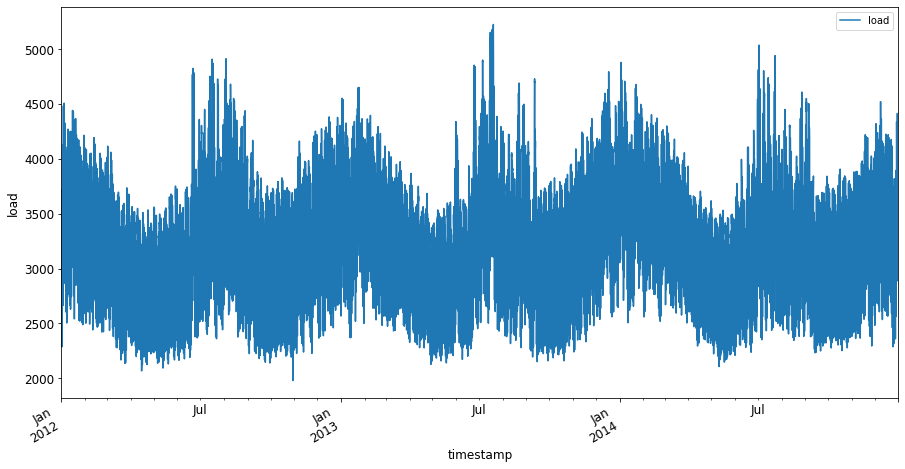

In [19]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

## လေ့ကျင့်မှုနှင့် စမ်းသပ်မှု ဒေတာအစုများ ဖန်တီးရန်

### လေ့ကျင့်မှုနှင့် စမ်းသပ်မှုအတွက် ဒေတာကို ခွဲခြားခြင်း

မော်ဒယ်တစ်ခုကို သင်ကြားရန်အတွက်၊ သင့်တွင် လေ့ကျင့်မှုနှင့် စမ်းသပ်မှုအတွက် သီးခြား ဒေတာအစုများရှိရမည်။  
လေ့ကျင့်မှုဒေတာသည် မော်ဒယ်ကို သင်ကြားရန်အသုံးပြုမည့် ဒေတာဖြစ်ပြီး၊ စမ်းသပ်မှုဒေတာသည် မော်ဒယ်၏ စွမ်းဆောင်ရည်ကို အကဲဖြတ်ရန် အသုံးပြုမည့် ဒေတာဖြစ်သည်။

[!NOTE]  
လေ့ကျင့်မှုနှင့် စမ်းသပ်မှုဒေတာများသည် အချိုးကျစွာ ခွဲခြားထားရမည်။ ပုံမှန်အားဖြင့် 70-80% ကို လေ့ကျင့်မှုအတွက် အသုံးပြုပြီး၊ 20-30% ကို စမ်းသပ်မှုအတွက် ထားရှိသည်။

### ဒေတာကို မျှတစွာ ခွဲခြားရန်

ဒေတာကို ခွဲခြားရာတွင်၊ အမျိုးအစားများ (categories) သို့မဟုတ် label များသည် လိုအပ်သလို မျှတစွာ ဖြန့်ဝေထားရမည်။  
ဤအချက်သည် မော်ဒယ်၏ စွမ်းဆောင်ရည်ကို တိုးတက်စေပြီး၊ အမျိုးအစားတစ်ခုခုအပေါ် မော်ဒယ်၏ မျက်မှောက်မတည်စေရန် အရေးကြီးသည်။

[!TIP]  
@@INLINE_CODE_1@@ ကို အသုံးပြု၍ ဒေတာကို လွယ်ကူစွာ ခွဲခြားနိုင်သည်။ ဥပမာအားဖြင့်၊ @@CODE_BLOCK_1@@ သည် လေ့ကျင့်မှုနှင့် စမ်းသပ်မှုအတွက် ဒေတာကို မျှတစွာ ခွဲခြားပေးနိုင်သည်။

### စမ်းသပ်မှုဒေတာ၏ အရေးပါမှု

စမ်းသပ်မှုဒေတာသည် မော်ဒယ်၏ စွမ်းဆောင်ရည်ကို တိကျစွာ အကဲဖြတ်ရန် အရေးကြီးသည်။  
ဤဒေတာသည် မော်ဒယ်၏ လေ့ကျင့်မှုအတွင်း မသုံးထားသည့် ဒေတာဖြစ်ရမည်။  
ထို့ကြောင့်၊ စမ်းသပ်မှုဒေတာသည် မော်ဒယ်၏ အထွေထွေပြုမူမှု (generalization) ကို တိုင်းတာရန် အထောက်အကူပြုသည်။

[!WARNING]  
လေ့ကျင့်မှုဒေတာနှင့် စမ်းသပ်မှုဒေတာအကြား data leakage မဖြစ်စေရန် သေချာပါစေ။  
data leakage ဖြစ်ပါက၊ မော်ဒယ်၏ စွမ်းဆောင်ရည်ကို မှားယွင်းစွာ အကဲဖြတ်မိနိုင်သည်။

### လေ့ကျင့်မှုနှင့် စမ်းသပ်မှုဒေတာများကို သိမ်းဆည်းခြင်း

လေ့ကျင့်မှုနှင့် စမ်းသပ်မှုဒေတာများကို သီးခြားဖိုင်များသို့ သိမ်းဆည်းပါ။  
ဤနည်းလမ်းသည် မော်ဒယ်သင်ကြားမှုနှင့် စမ်းသပ်မှုလုပ်ငန်းစဉ်များကို ပိုမိုစနစ်တကျစေသည်။

[!IMPORTANT]  
ဒေတာများကို သိမ်းဆည်းရာတွင် ဖိုင်အမည်များနှင့် ဖိုင်ဖွဲ့စည်းမှုကို သေချာစွာ စီမံပါ။  
ဤအချက်သည် နောက်ထပ်လုပ်ငန်းစဉ်များတွင် အလွယ်တကူ အသုံးပြုနိုင်ရန် အထောက်အကူပြုသည်။


In [20]:
train_start_dt = '2014-11-01 00:00:00'
test_start_dt = '2014-12-30 00:00:00'    

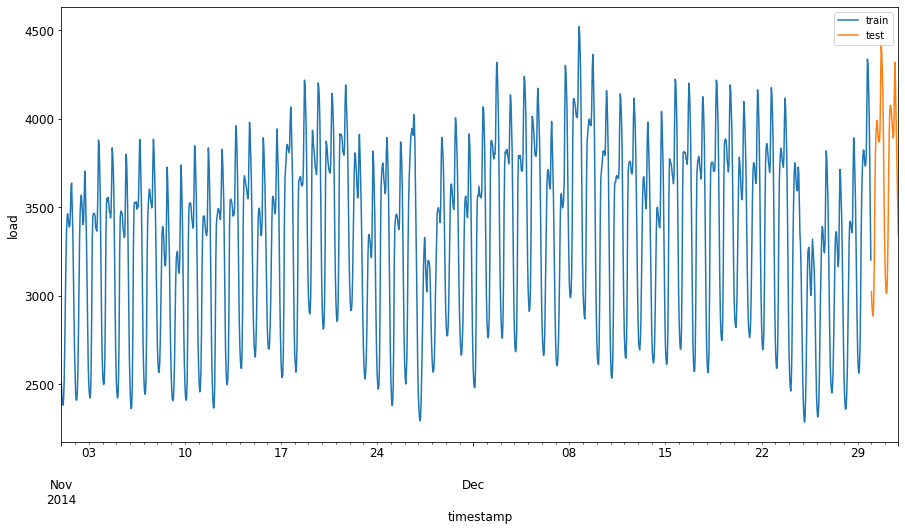

In [21]:
energy[(energy.index < test_start_dt) & (energy.index >= train_start_dt)][['load']].rename(columns={'load':'train'}) \
    .join(energy[test_start_dt:][['load']].rename(columns={'load':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [22]:
train = energy.copy()[(energy.index >= train_start_dt) & (energy.index < test_start_dt)][['load']]
test = energy.copy()[energy.index >= test_start_dt][['load']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1416, 1)
Test data shape:  (48, 1)


In [23]:
scaler = MinMaxScaler()
train['load'] = scaler.fit_transform(train)
train.head(10)

load
2014-11-01 00:00:00  0.10
2014-11-01 01:00:00  0.07
2014-11-01 02:00:00  0.05
2014-11-01 03:00:00  0.04
2014-11-01 04:00:00  0.06
2014-11-01 05:00:00  0.10
2014-11-01 06:00:00  0.19
2014-11-01 07:00:00  0.31
2014-11-01 08:00:00  0.40
2014-11-01 09:00:00  0.48

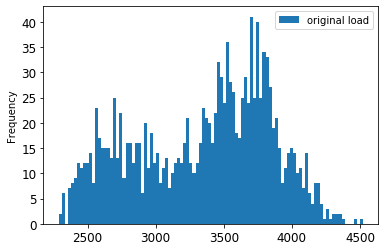

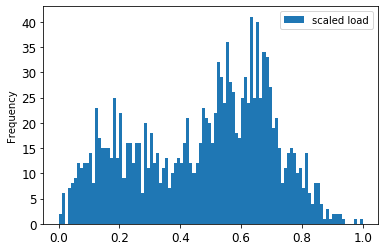

In [24]:
energy[(energy.index >= train_start_dt) & (energy.index < test_start_dt)][['load']].rename(columns={'load':'original load'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={'load':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

အာ့ဒီ စမ်းသပ်ဒေတာကိုလည်း အတိုင်းအတာချိန်ဆကို ပြုလုပ်ကြစို့


In [25]:
test['load'] = scaler.transform(test)
test.head()

load
2014-12-30 00:00:00  0.33
2014-12-30 01:00:00  0.29
2014-12-30 02:00:00  0.27
2014-12-30 03:00:00  0.27
2014-12-30 04:00:00  0.30

In [26]:
# Specify the number of steps to forecast ahead
HORIZON = 3
print('Forecasting horizon:', HORIZON, 'hours')

Forecasting horizon: 3 hours


In [27]:
order = (4, 1, 0)
seasonal_order = (1, 1, 0, 24)

model = SARIMAX(endog=train, order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                               load   No. Observations:                 1416
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 24)   Log Likelihood                3477.239
Date:                            Thu, 30 Sep 2021   AIC                          -6942.477
Time:                                    14:36:28   BIC                          -6911.050
Sample:                                11-01-2014   HQIC                         -6930.725
                                     - 12-29-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8403      0.016     52.226      0.000       0.809       0.872
ar.L2         -0.5220      0.034   

HORIZON အဆင့်တစ်ခုစီအတွက် စမ်းသပ်ဒေတာအချက်အလက်တစ်ခုစီ ဖန်တီးပါ။


In [28]:
test_shifted = test.copy()

for t in range(1, HORIZON):
    test_shifted['load+'+str(t)] = test_shifted['load'].shift(-t, freq='H')
    
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

load  load+1  load+2
2014-12-30 00:00:00  0.33    0.29    0.27
2014-12-30 01:00:00  0.29    0.27    0.27
2014-12-30 02:00:00  0.27    0.27    0.30
2014-12-30 03:00:00  0.27    0.30    0.41
2014-12-30 04:00:00  0.30    0.41    0.57

In [29]:
%%time
training_window = 720 # dedicate 30 days (720 hours) for training

train_ts = train['load']
test_ts = test_shifted

history = [x for x in train_ts]
history = history[(-training_window):]

predictions = list()

# let's user simpler model for demonstration
order = (2, 1, 0)
seasonal_order = (1, 1, 0, 24)

for t in range(test_ts.shape[0]):
    model = SARIMAX(endog=history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps = HORIZON)
    predictions.append(yhat)
    obs = list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t+1, ': predicted =', yhat, 'expected =', obs)

2014-12-30 00:00:00
1 : predicted = [0.32 0.29 0.28] expected = [0.32945389435989236, 0.2900626678603402, 0.2739480752014323]
2014-12-30 01:00:00
2 : predicted = [0.3  0.29 0.3 ] expected = [0.2900626678603402, 0.2739480752014323, 0.26812891674127126]
2014-12-30 02:00:00
3 : predicted = [0.27 0.28 0.32] expected = [0.2739480752014323, 0.26812891674127126, 0.3025962399283795]
2014-12-30 03:00:00
4 : predicted = [0.28 0.32 0.42] expected = [0.26812891674127126, 0.3025962399283795, 0.40823634735899716]
2014-12-30 04:00:00
5 : predicted = [0.3  0.39 0.54] expected = [0.3025962399283795, 0.40823634735899716, 0.5689346463742166]
2014-12-30 05:00:00
6 : predicted = [0.4  0.55 0.66] expected = [0.40823634735899716, 0.5689346463742166, 0.6799462846911368]
2014-12-30 06:00:00
7 : predicted = [0.57 0.68 0.75] expected = [0.5689346463742166, 0.6799462846911368, 0.7309758281110115]
2014-12-30 07:00:00
8 : predicted = [0.68 0.75 0.8 ] expected = [0.6799462846911368, 0.7309758281110115, 0.75111906893

ခန့်မှန်းချက်များကို အမှန်တကယ်သော အလားအလာနှင့် နှိုင်းယှဉ်ပါ


In [30]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = test.index[0:len(test.index)-HORIZON+1]
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.array(np.transpose(test_ts)).ravel()
eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])
eval_df.head()

timestamp    h  prediction   actual
0 2014-12-30 00:00:00  t+1    3,008.74 3,023.00
1 2014-12-30 01:00:00  t+1    2,955.53 2,935.00
2 2014-12-30 02:00:00  t+1    2,900.17 2,899.00
3 2014-12-30 03:00:00  t+1    2,917.69 2,886.00
4 2014-12-30 04:00:00  t+1    2,946.99 2,963.00

အားလုံးသောခန့်မှန်းချက်များအတွက် **အလယ်အလတ်တိကျမှုရာခိုင်နှုန်းအမှား (MAPE)** ကိုတွက်ချက်ပါ

$$MAPE = \frac{1}{n} \sum_{t=1}^{n}|\frac{actual_t - predicted_t}{actual_t}|$$


In [31]:
if(HORIZON > 1):
    eval_df['APE'] = (eval_df['prediction'] - eval_df['actual']).abs() / eval_df['actual']
    print(eval_df.groupby('h')['APE'].mean())

h
t+1   0.01
t+2   0.01
t+3   0.02
Name: APE, dtype: float64


In [32]:
print('One step forecast MAPE: ', (mape(eval_df[eval_df['h'] == 't+1']['prediction'], eval_df[eval_df['h'] == 't+1']['actual']))*100, '%')

One step forecast MAPE:  0.5570581332313952 %


In [33]:
print('Multi-step forecast MAPE: ', mape(eval_df['prediction'], eval_df['actual'])*100, '%')

Multi-step forecast MAPE:  1.1460048657704118 %


စမ်းသပ်မှုအစု၏ပထမဆုံးအပတ်အတွက် ခန့်မှန်းချက်များနှင့် အမှန်တကယ်တန်ဖိုးများကို ရှုထောင့်ပုံဖော်ပါ။


No handles with labels found to put in legend.


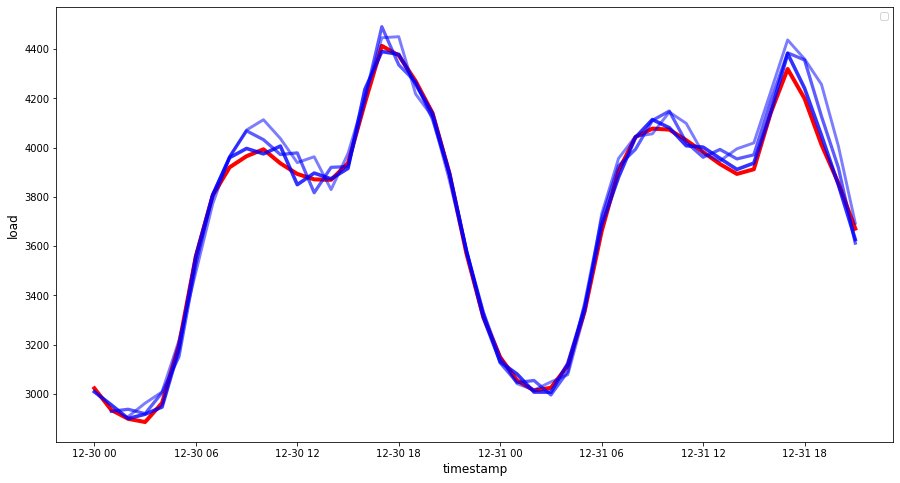

In [34]:
if(HORIZON == 1):
    ## Plotting single step forecast
    eval_df.plot(x='timestamp', y=['actual', 'prediction'], style=['r', 'b'], figsize=(15, 8))

else:
    ## Plotting multi step forecast
    plot_df = eval_df[(eval_df.h=='t+1')][['timestamp', 'actual']]
    for t in range(1, HORIZON+1):
        plot_df['t+'+str(t)] = eval_df[(eval_df.h=='t+'+str(t))]['prediction'].values

    fig = plt.figure(figsize=(15, 8))
    ax = plt.plot(plot_df['timestamp'], plot_df['actual'], color='red', linewidth=4.0)
    ax = fig.add_subplot(111)
    for t in range(1, HORIZON+1):
        x = plot_df['timestamp'][(t-1):]
        y = plot_df['t+'+str(t)][0:len(x)]
        ax.plot(x, y, color='blue', linewidth=4*math.pow(.9,t), alpha=math.pow(0.8,t))
    
    ax.legend(loc='best')
    
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()


---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေပါသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်ဆိုမှုများတွင် အမှားများ သို့မဟုတ် မတိကျမှုများ ပါဝင်နိုင်သည်ကို ကျေးဇူးပြု၍ သိရှိပါ။ မူရင်းစာရွက်စာတမ်းကို ၎င်း၏ မူလဘာသာစကားဖြင့် အာဏာတည်သောရင်းမြစ်အဖြစ် သတ်မှတ်ပါ။ အရေးကြီးသော အချက်အလက်များအတွက် လူက ဘာသာပြန်ဝန်ဆောင်မှုကို အသုံးပြုရန် အကြံပြုပါသည်။ ဤဘာသာပြန်ကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပာယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
